-------------------------


In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import IPython
from IPython import display
import sklearn

In [ ]:

import io
airbnb = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
data = airbnb.copy()
data 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print ("The shape of the  data is (row, column):"+ str(airbnb.shape))
print (airbnb.info())

The shape of the  data is (row, column):(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non

In [ ]:

airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

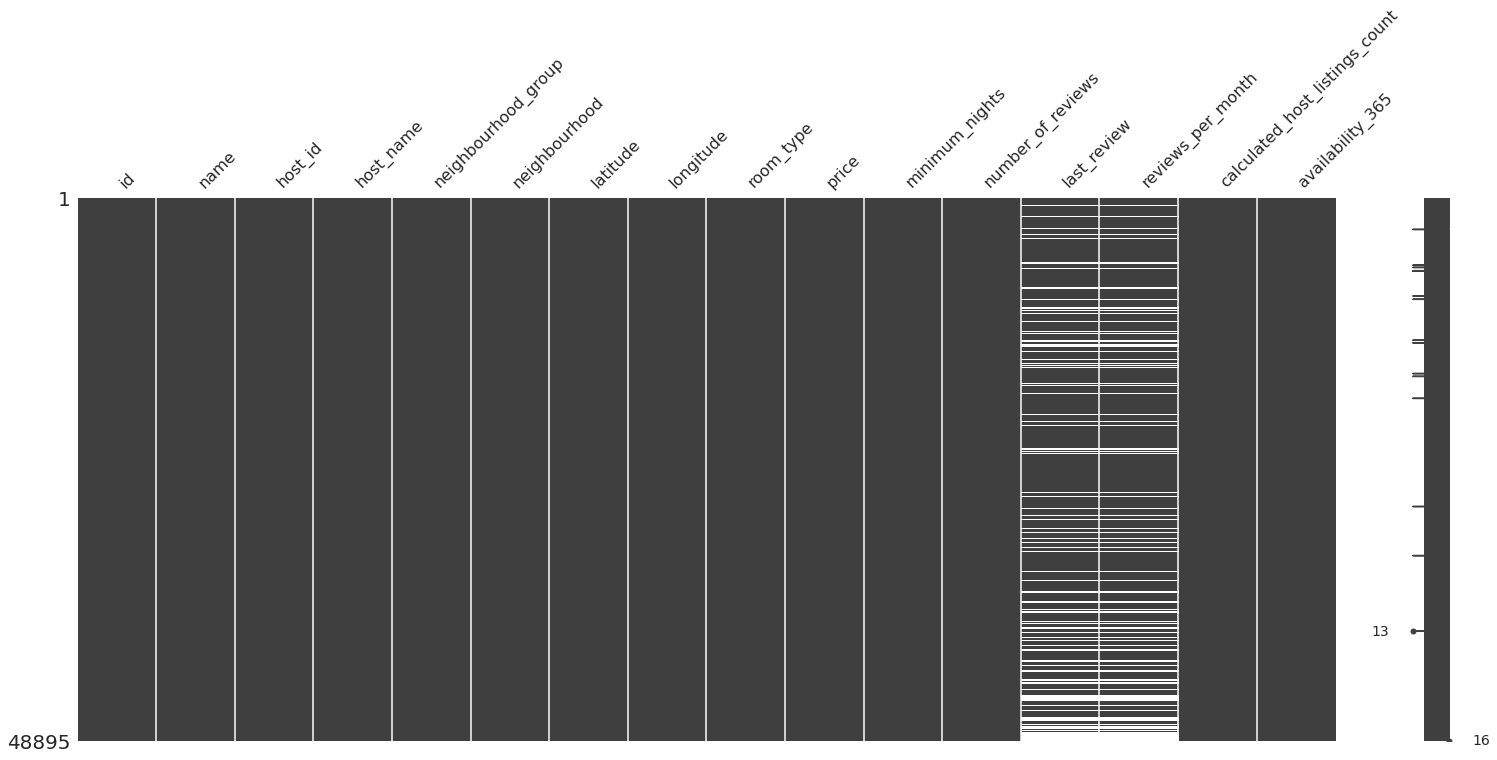

In [ ]:

import missingno as msno 
msno.matrix(airbnb)

In [ ]:

print('Data columns with null values:',airbnb.isnull().sum(), sep = '\n')

Data columns with null values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
airbnb['reviews_per_month'].fillna(value=0, inplace=True)
print('Reviews_per_month column with null values:',airbnb['reviews_per_month'].isnull().sum(), sep = '\n')

Reviews_per_month column with null values:
0


In [ ]:
airbnb.drop(['id','host_name','last_review'], axis = 1,inplace=True) 
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Text(0.5, 1.0, 'reviews_per_month')

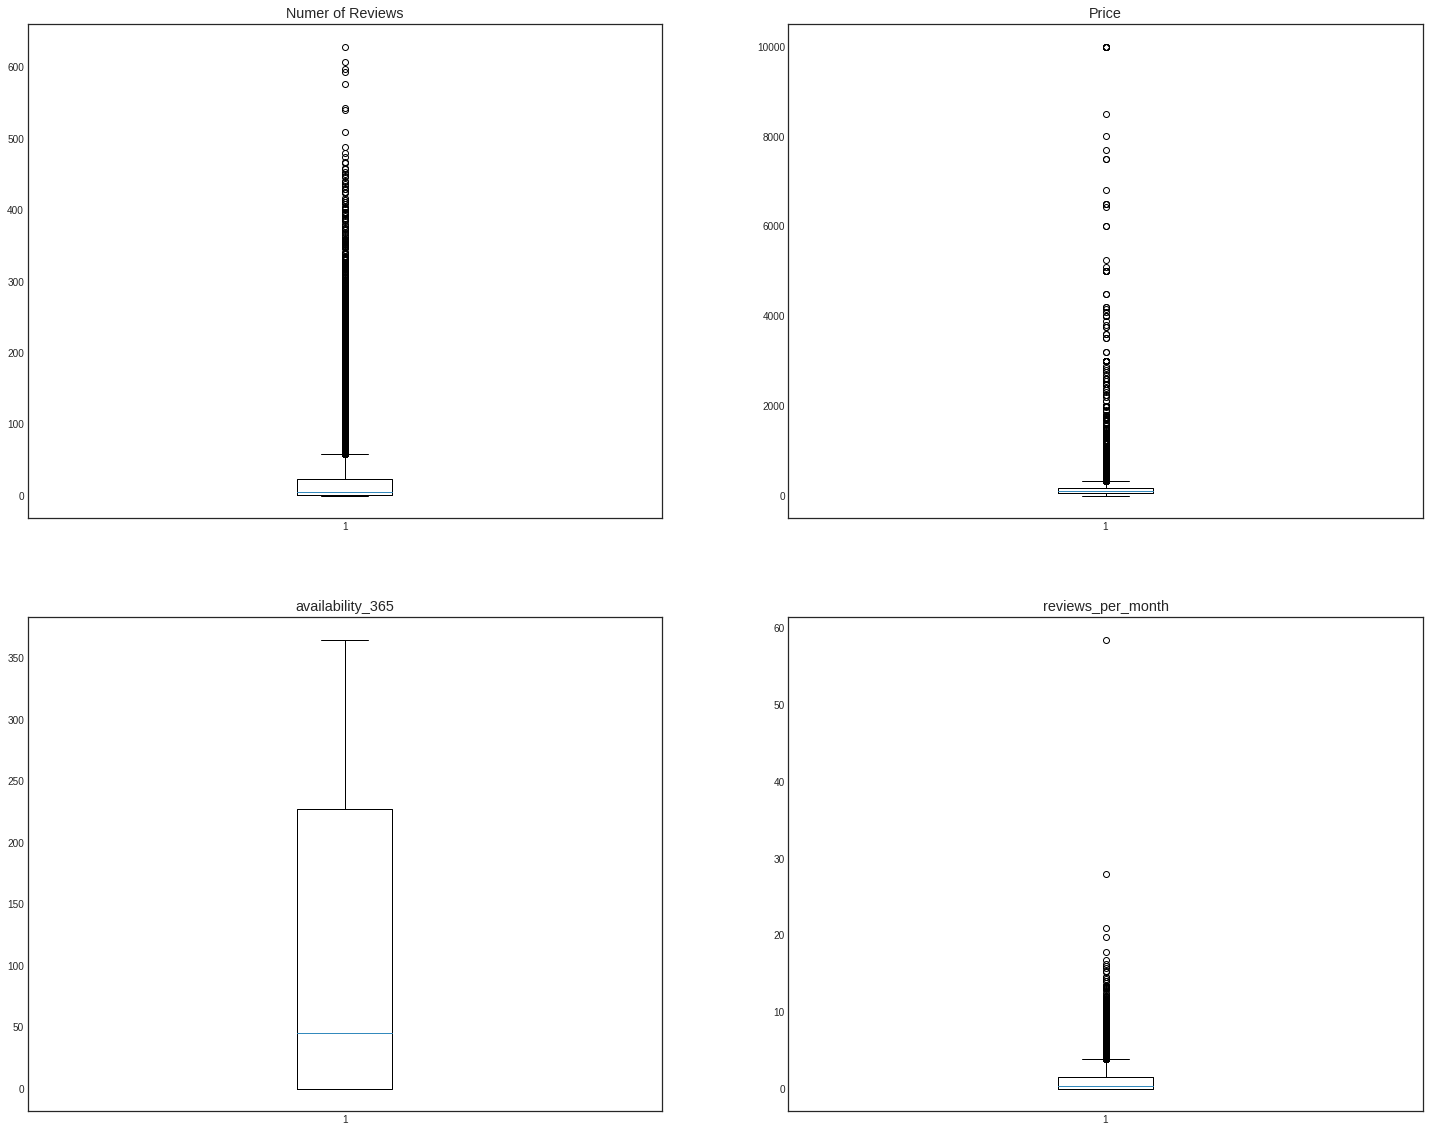

In [ ]:
plt.figure(figsize = (25, 20))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(airbnb['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(airbnb['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(airbnb['reviews_per_month'])
ax.set_title('reviews_per_month')

In [ ]:
Q1 = airbnb['price'].quantile(0.25)
Q21 = airbnb['price'].quantile(0.50)
Q3 = airbnb['price'].quantile(0.75)
Q41 = airbnb['price'].quantile(1.0)
print(Q1)
print(Q21)
print(Q3)
print(Q41)

69.0
106.0
175.0
10000.0


In [ ]:
IQR = Q3 - Q1
IQR

106.0

In [ ]:
filter = (airbnb['price'] >= Q1 - 1.5 * IQR) & (airbnb['price'] <= Q3 + 1.5 *IQR)
airbnb1=airbnb.loc[filter]
airbnb1
#print(filter)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [ ]:
Q1 = airbnb1['number_of_reviews'].quantile(0.25)
Q3 = airbnb1['number_of_reviews'].quantile(0.75)
#Q5 = airbnb1['number_of_reviews'].quantile(0.50)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (airbnb1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb1['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb2=airbnb1.loc[filter]

In [ ]:



Q1 = airbnb2['reviews_per_month'].quantile(0.25)
Q3 = airbnb2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

  
airbnb_new=airbnb2.loc[filter]

In [ ]:
airbnb_new

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


Text(0.5, 1.0, 'reviews_per_month')

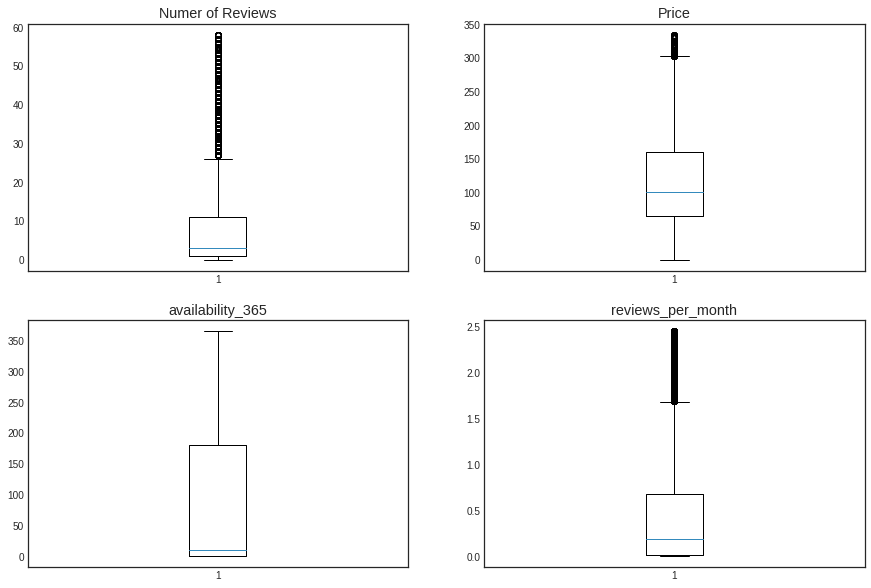

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(airbnb_new['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(airbnb_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(airbnb_new['reviews_per_month'])
ax.set_title('reviews_per_month')

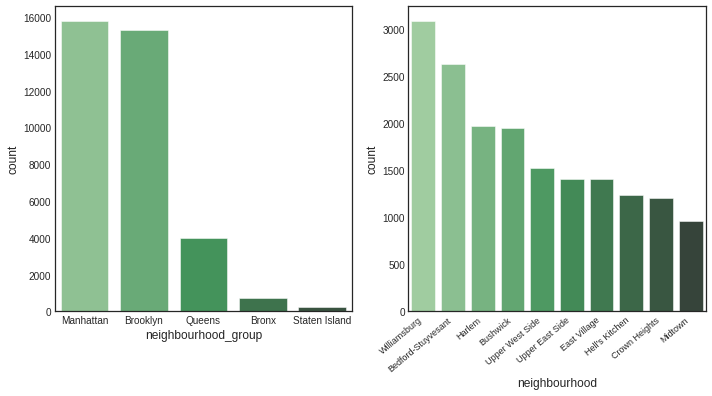

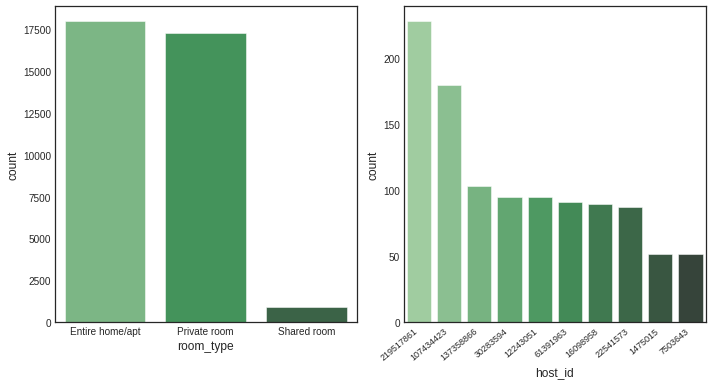

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 Neighbourhood
plt.subplot(222)
ax=sns.countplot(x="neighbourhood", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#Room type
plt.subplot(223)
sns.countplot(x="room_type", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.room_type.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 hosts
plt.subplot(224)
ax=sns.countplot(x="host_id", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.host_id.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

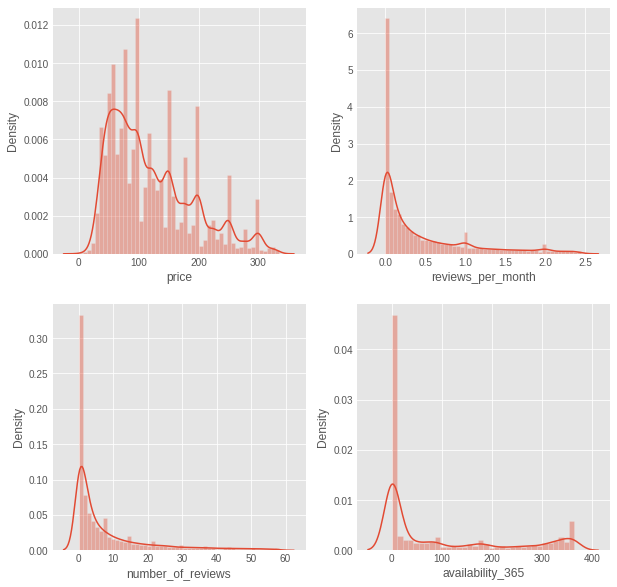

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')
plt.subplot(221)
sns.distplot(airbnb_new['price'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.distplot(airbnb_new['reviews_per_month'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.distplot(airbnb_new['number_of_reviews'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(224)
sns.distplot(airbnb_new['availability_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)

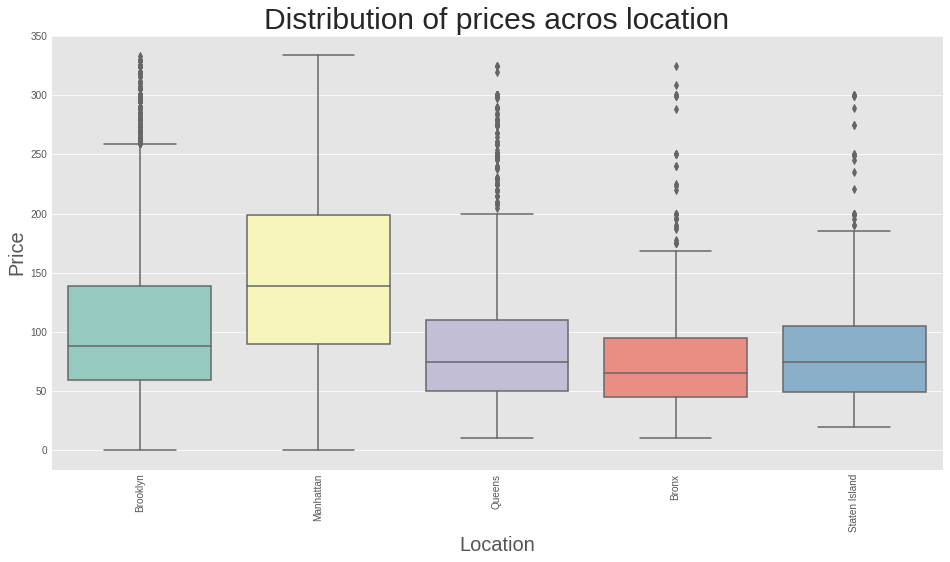

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = airbnb_new['neighbourhood_group'], y =airbnb_new['price'], data = airbnb_new, palette = 'Set3')
ax.set_xlabel(xlabel = 'Location', fontsize = 20)
ax.set_ylabel(ylabel = 'Price', fontsize = 20)
ax.set_title(label = 'Distribution of prices acros location', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

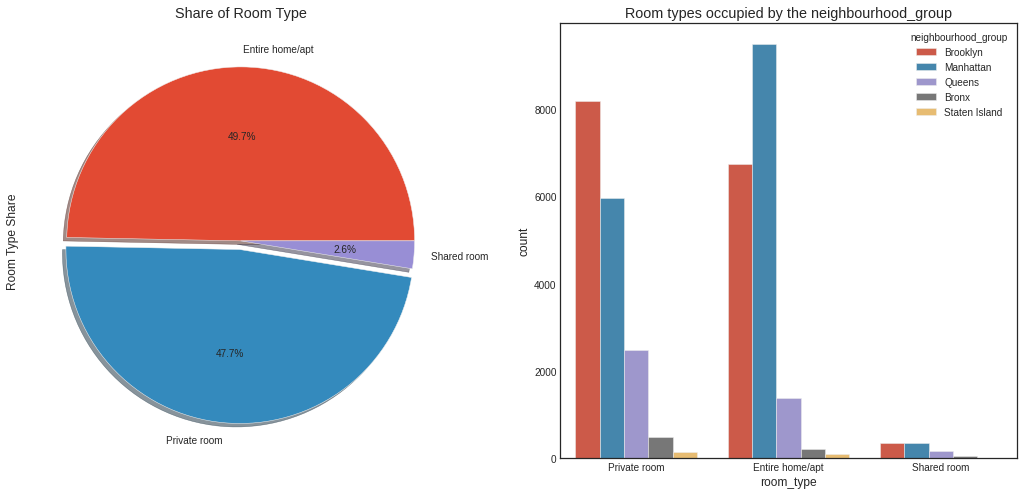

In [ ]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
airbnb_new['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = airbnb_new)
ax[1].set_title('Room types occupied by the neighbourhood_group')
plt.show()

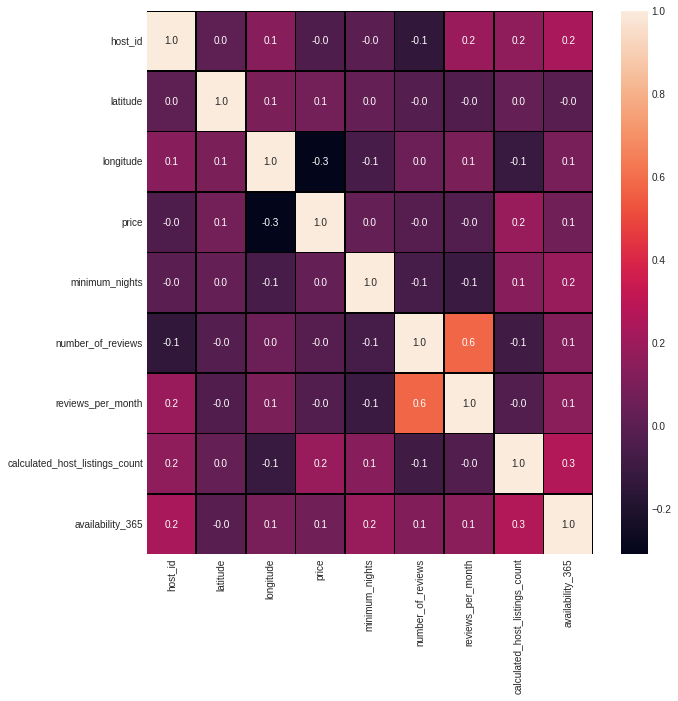

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(airbnb_new.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

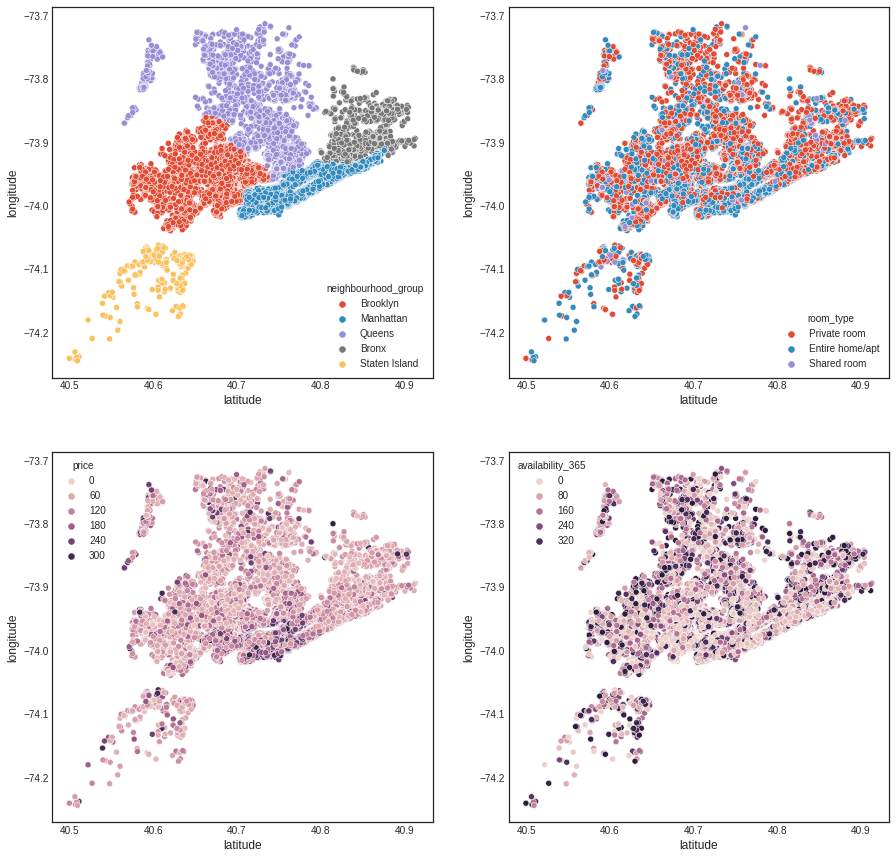

In [ ]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=airbnb_new)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=airbnb_new)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=airbnb_new)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=airbnb_new)

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
number_of_reviews = airbnb_new[(airbnb_new.number_of_reviews.isin(range(50,58)))]
# Creating a map
m_2 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
for idx, row in number_of_reviews.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Displaying the map
m_2


In [ ]:
m_3 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
mc = MarkerCluster()
for idx, row in number_of_reviews.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)

# Displaying the map
m_3

In [ ]:
 
airbnb_features.head()

,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
0,Brooklyn,Private room,365,1,6,0.21,9
1,Manhattan,Entire home/apt,355,1,2,0.38,45
2,Manhattan,Private room,365,3,1,0.00,0
4,Manhattan,Entire home/apt,0,10,1,0.10,9
6,Brooklyn,Private room,0,45,1,0.40,49


In [ ]:
dummy_neighbourhood=pd.get_dummies(airbnb_features['neighbourhood_group'], prefix='dummy')
dummy_roomtype=pd.get_dummies(airbnb_features['room_type'], prefix='dummy')
airbnb_features = pd.concat([airbnb_features,dummy_neighbourhood,dummy_roomtype],axis=1)
airbnb_features.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)
airbnb_features

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,365,1,6,0.21,9,0,1,0,0,0,0,1,0
1,355,1,2,0.38,45,0,0,1,0,0,1,0,0
2,365,3,1,0.00,0,0,0,1,0,0,0,1,0
4,0,10,1,0.10,9,0,0,1,0,0,1,0,0
6,0,45,1,0.40,49,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,9,2,2,0.00,0,0,1,0,0,0,0,1,0
48891,36,4,2,0.00,0,0,1,0,0,0,0,1,0
48892,27,10,1,0.00,0,0,0,1,0,0,1,0,0
48893,2,1,6,0.00,0,0,0,1,0,0,0,0,1


In [ ]:
from sklearn import preprocessing
X=preprocessing.scale(airbnb_features)
y=airbnb_new.price
print(X)
print(y)

[[ 2.05772879 -0.32012801 -0.04432648 ... -0.99381927  1.04623811
  -0.16236422]
 [ 1.98104135 -0.32012801 -0.16550653 ...  1.00621917 -0.95580537
  -0.16236422]
 [ 2.05772879 -0.22909945 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]
 ...
 [-0.53430689  0.0895005  -0.19580154 ...  1.00621917 -0.95580537
  -0.16236422]
 [-0.7260255  -0.32012801 -0.04432648 ... -0.99381927 -0.95580537
   6.15899258]
 [-0.56498187 -0.04704234 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]]
0        149
1        225
2        150
4         80
6         60
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 36130, dtype: int64


In [ ]:
X = pd.DataFrame(X)
X=X.rename(index=str, columns={0:'availability_365',1:'minimum_nights',2:'calculated_host_listings_count',3:'reviews_per_month',
                             4:'number_of_reviews',5:'dummy_Bronx',6:'dummy_Brooklyn',7:'dummy_Manhattan',8:'dummy_Queens',9:'dummy_Staten Island',
                             10:'dummy_Entire home/apt',11:'dummy_Private room',12:'dummy_Shared room'})
X.head()

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,2.057729,-0.320128,-0.044326,-0.411679,0.059627,-0.145597,1.166344,-0.881923,-0.353581,-0.083641,-0.993819,1.046238,-0.162364
1,1.981041,-0.320128,-0.165507,-0.123768,3.028170,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,1.006219,-0.955805,-0.162364
2,2.057729,-0.229099,-0.195802,-0.767335,-0.682508,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,-0.993819,1.046238,-0.162364
3,-0.741363,0.089500,-0.195802,-0.597975,0.059627,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,1.006219,-0.955805,-0.162364
4,-0.741363,1.682500,-0.195802,-0.089896,3.358008,-0.145597,1.166344,-0.881923,-0.353581,-0.083641,-0.993819,1.046238,-0.162364


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', ExtraTreesRegressor(
                                                              random_state=0))])
my_pipeline

Pipeline(memory=None,
         steps=[('model',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False))],
         verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores =  cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

MAE scores:
 [-39.83604533 -39.06345507 -38.06138885 -38.68330312 -43.21958967]
Average MAE score (across experiments): -39.77275640763573


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.048049


In [ ]:
# Drop leaky predictors from dataset
potential_leaks = ['reviews_per_month','number_of_reviews']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.059037


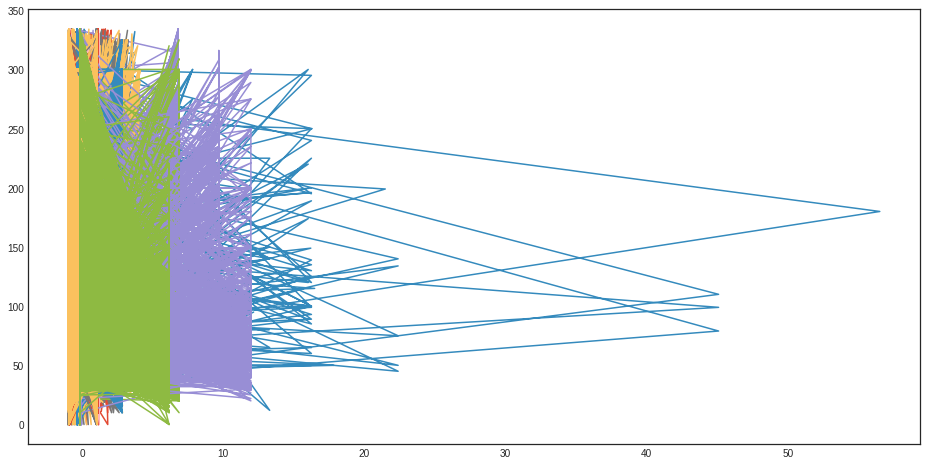

In [ ]:
plt.plot(X, y)
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X2, y, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(val_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(val_X, val_y)))

Accuracy of logistic regression classifier on test set: 0.08


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  38
Max leaf nodes: 50  		 Mean Absolute Error:  36
Max leaf nodes: 500  		 Mean Absolute Error:  36
Max leaf nodes: 5000  		 Mean Absolute Error:  40


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [ ]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

Mean Absolute error of the Model:
37.496143488215644


In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

[06:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 35.809692918297515


In [ ]:
#Code forked from: https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(val_y).round(),
        'Predicted Values': predictions.round()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,205,146.0
1,40,57.0
2,50,71.0
3,50,56.0
4,175,159.0


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [ ]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
data.shape

(48895, 16)

Text(0.5, 1.0, 'number_of_reviews vs price')

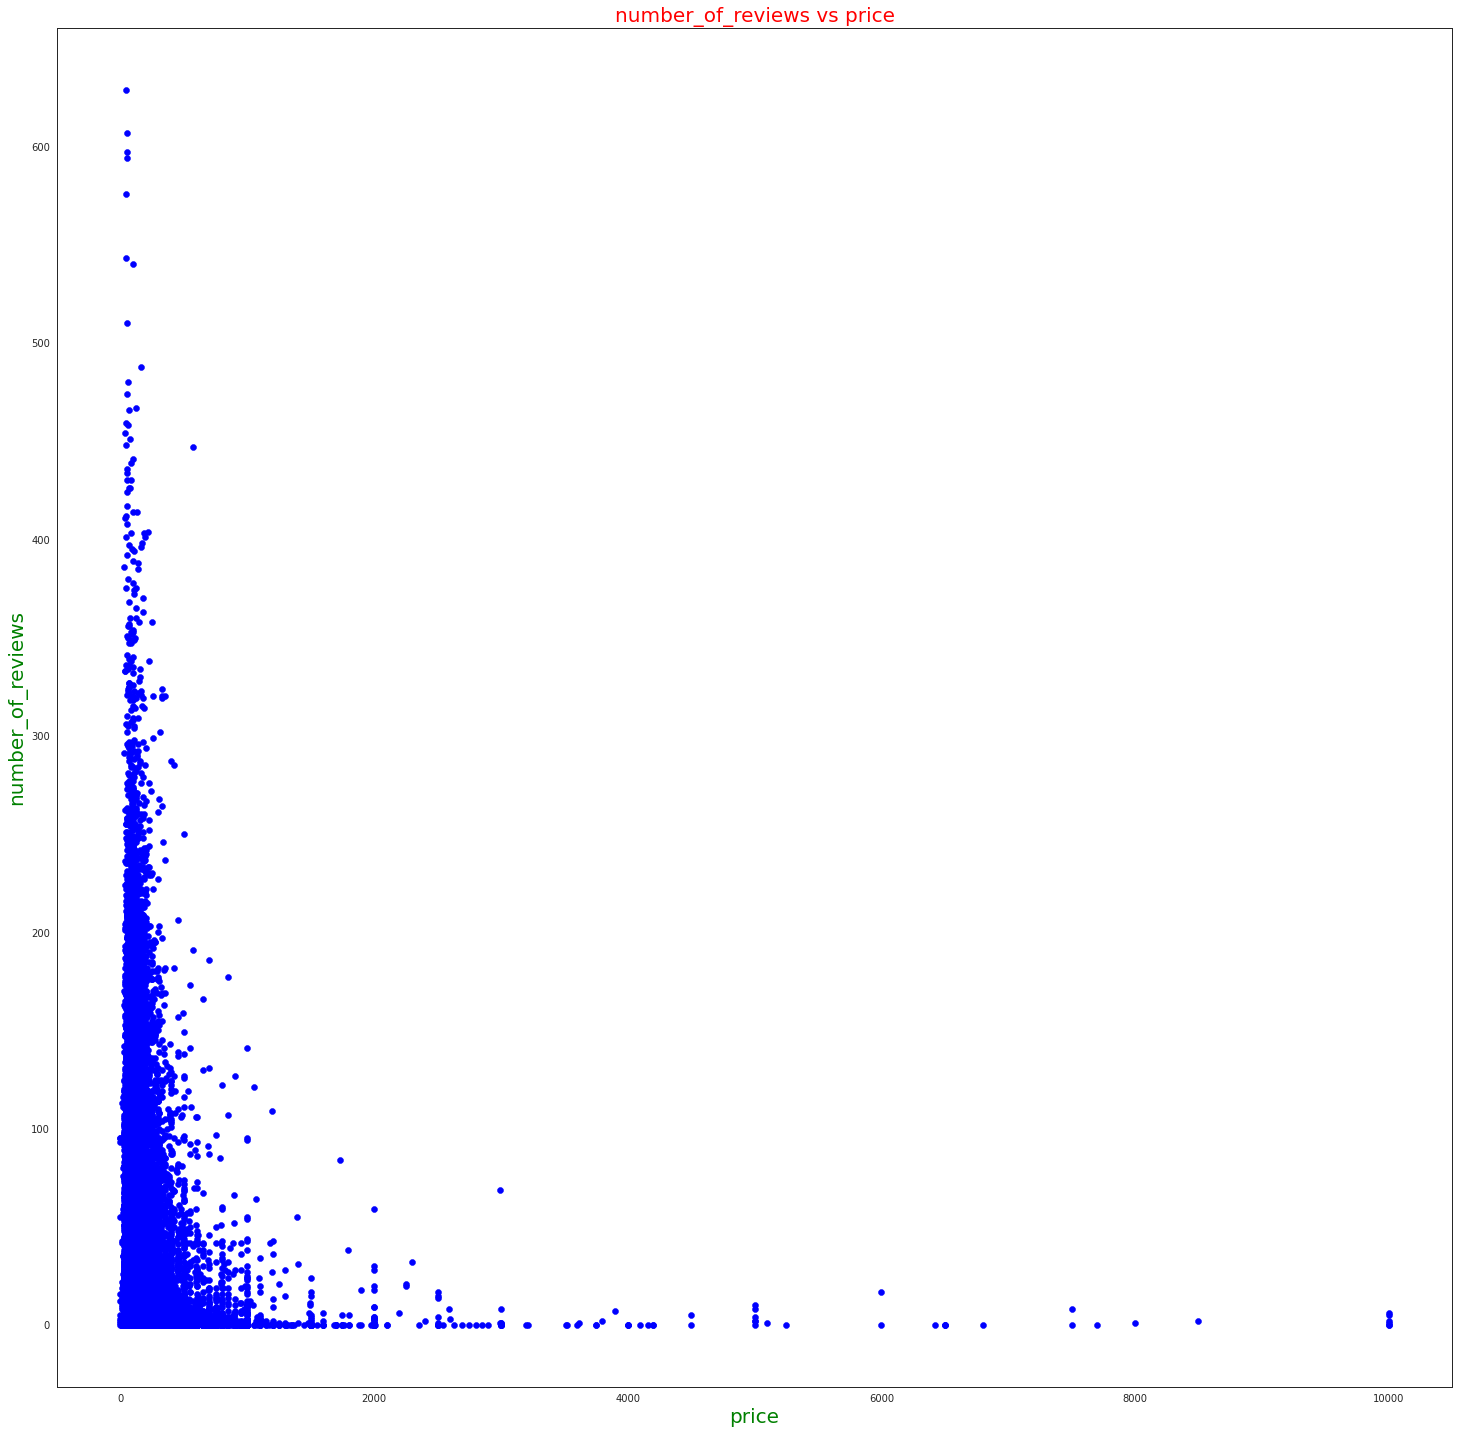

In [ ]:
plt.figure(figsize=(25,25))
plt.scatter(data.loc[:, 'price'], data.loc[:, 'number_of_reviews'], color='blue')
plt.xlabel('price', color='green', fontsize=20)
plt.ylabel('number_of_reviews', color='green', fontsize=20)
plt.title('number_of_reviews vs price', color='red', fontsize=20)

In [ ]:
data = data.fillna(0)
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
data = data.set_index('neighbourhood_group')
data.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Brooklyn,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
Manhattan,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
Manhattan,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
Brooklyn,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
Manhattan,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
Manhattan,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
Brooklyn,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
Manhattan,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
Manhattan,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


In [ ]:
data.tail(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Manhattan,36478343,Welcome all as family,274273284,Anastasia,East Harlem,40.78749,-73.94749,Private room,140,1,0,0,0.0,1,180
Manhattan,36478357,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088,Joseph,Harlem,40.80953,-73.95410,Private room,60,1,0,0,0.0,1,26
Brooklyn,36479230,Studio sized room with beautiful light,65767720,Melanie,Bushwick,40.70418,-73.91471,Private room,42,7,0,0,0.0,1,16
Queens,36479723,Room for rest,41326856,Jeerathinan,Elmhurst,40.74477,-73.87727,Private room,45,1,0,0,0.0,5,172
Brooklyn,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,0,0.0,1,22
Brooklyn,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0,0.0,3,365
Brooklyn,36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Greenpoint,40.72585,-73.94001,Private room,54,6,0,0,0.0,1,15
Brooklyn,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Bushwick,40.69652,-73.91079,Private room,40,20,0,0,0.0,1,31
Manhattan,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,East Harlem,40.79755,-73.93614,Private room,75,2,0,0,0.0,2,364


In [ ]:
df_B = pd.DataFrame(data.loc['Brooklyn', ['price', 'number_of_reviews']])
df_B

,price,number_of_reviews
neighbourhood_group,,
Brooklyn,149,9
Brooklyn,89,270
Brooklyn,60,49
Brooklyn,89,167
Brooklyn,140,148
...,...,...
Brooklyn,40,0
Brooklyn,190,0
Brooklyn,170,0


In [ ]:
df_M = pd.DataFrame(data.loc["Manhattan", ["price","number_of_reviews"]])
df_Q = pd.DataFrame(data.loc["Queens", ["price","number_of_reviews"]])
df_X = pd.DataFrame(data.loc["Bronx", ["price","number_of_reviews"]])
df_S = pd.DataFrame(data.loc["Staten Island", ["price","number_of_reviews"]])
df_Q

,price,number_of_reviews
neighbourhood_group,,
Queens,130,248
Queens,70,25
Queens,140,1
Queens,79,28
Queens,350,10
...,...,...
Queens,68,0
Queens,93,0
Queens,58,0


In [ ]:
sc = StandardScaler()
X_std_Q = sc.fit_transform(df_Q)
X_std_Q

array([[ 0.18243356,  4.2405064 ],
       [-0.17665993, -0.0519779 ],
       [ 0.24228248, -0.5139493 ],
       ...,
       [-0.24847862, -0.53319811],
       [-0.32628221, -0.53319811],
       [-0.20658438, -0.53319811]])

In [ ]:
Km_Q = KMeans(n_clusters=5, max_iter=100)
Km_Q.fit(X_std_Q)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Km_Q.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
a0 = []
a1 = []
a2 = []
a3 = []
a4 = []
for i in Km_Q.labels_:
  if i == 2:
    a2.append(i)
  if i == 0:
    a0.append(i)
  if i == 1:
    a1.append(i)
  if i == 3:
    a3.append(i)
  if i == 4:
    a4.append(i)

In [ ]:
print(len(a0))
print(len(a1))
print(len(a2))
print(len(a3))
print(len(a4))

4669
874
107
15
1


In [ ]:
print(a0)
print(a1)
print(a2)
print(a3)
print(a4)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:

centroids_Q = Km_Q.cluster_centers_

In [ ]:
centroids_Q

array([[-2.16347370e-02, -3.39582825e-01],
       [-7.60943540e-02,  1.20763829e+00],
       [-1.50091482e-01,  5.15221632e+00],
       [ 8.25206218e+00, -3.52259311e-01],
       [ 5.92533121e+01, -4.94700494e-01]])

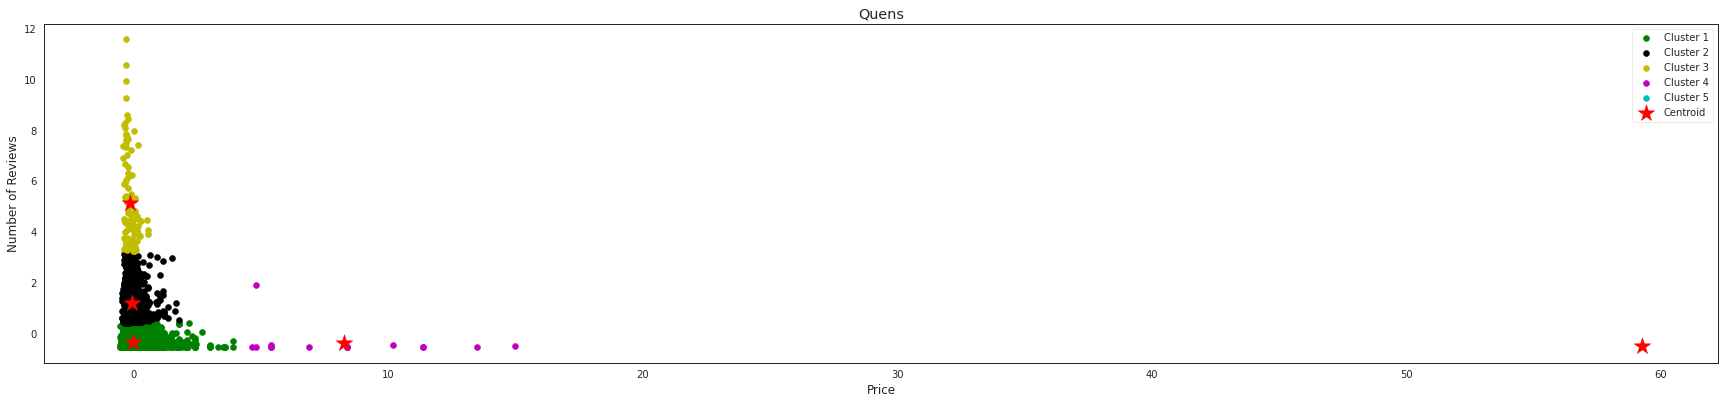

In [ ]:
fig, ax = plt.subplots(figsize=(30, 25))
plt.scatter(X_std_Q[Km_Q.labels_ == 0, 0], X_std_Q[Km_Q.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_Q[Km_Q.labels_ == 1, 0], X_std_Q[Km_Q.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_Q[Km_Q.labels_ == 2, 0], X_std_Q[Km_Q.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_Q[Km_Q.labels_ == 3, 0], X_std_Q[Km_Q.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_Q[Km_Q.labels_ == 4, 0], X_std_Q[Km_Q.labels_ == 4,1], c ='c', label="Cluster 5")
plt.scatter(centroids_Q[:, 0], centroids_Q[:, 1], marker ='*', s=300, c = 'r', label='Centroid')
plt.legend()
#plt.xlim([-.5, 30])
#plt.ylim([-.5, 30])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Quens')
ax.set_aspect('equal')

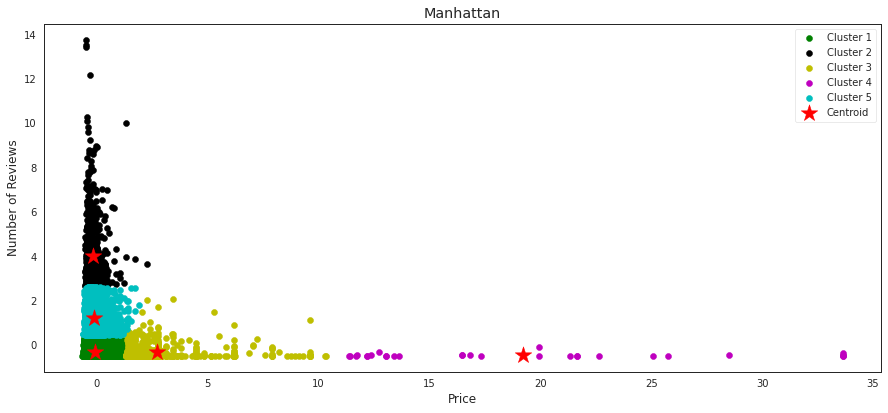

In [ ]:
X_std_M = StandardScaler().fit_transform(df_M)

km_M = KMeans(n_clusters=5, max_iter=100)
km_M.fit(X_std_M)
centroids_M = km_M.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_M[km_M.labels_ == 0, 0], X_std_M[km_M.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_M[km_M.labels_ == 1, 0], X_std_M[km_M.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_M[km_M.labels_ == 2, 0], X_std_M[km_M.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_M[km_M.labels_ == 3, 0], X_std_M[km_M.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_M[km_M.labels_ == 4, 0], X_std_M[km_M.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_M[:, 0], centroids_M[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Manhattan')
ax.set_aspect('equal')

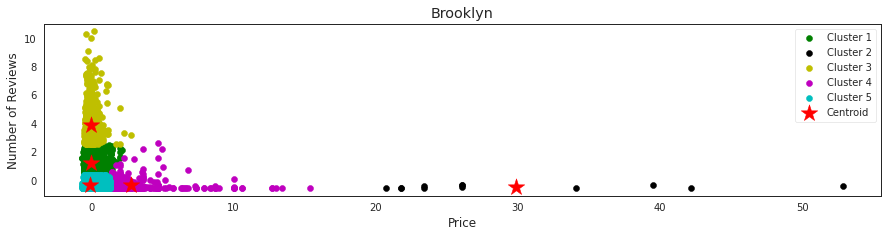

In [ ]:
X_std_B = StandardScaler().fit_transform(df_B)

km_B = KMeans(n_clusters=5, max_iter=100)
km_B.fit(X_std_B)
centroids_B = km_B.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_B[km_B.labels_ == 0, 0], X_std_B[km_B.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_B[km_B.labels_ == 1, 0], X_std_B[km_B.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_B[km_B.labels_ == 2, 0], X_std_B[km_B.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_B[km_B.labels_ == 3, 0], X_std_B[km_B.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_B[km_B.labels_ == 4, 0], X_std_B[km_B.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_B[:, 0], centroids_B[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Brooklyn')
ax.set_aspect('equal')